In [1]:
import numpy as np;
import pandas as pd;
import scipy.stats as stats;

import wquantiles as wq;

from statsmodels import robust;
import matplotlib;
import matplotlib.pylab as plt;

import seaborn as sns;

##### More Resources 
* https://onlinestatbook.com/2/introduction/importanceM.html
* 

# Chapter 1: Exploratory Data Analysis 

-----



## Elements of Structured Data

* Tables w/ Rows & Columns -> commonest form of structured data. 

#### Types of Structured Data

- Numeric
   - Continous (wind speed, time duration, temprature ...)
   -  Discrete (count) 
- Categorial
  - Binary Data, (only two options are available)
  - Ordinal Data  (numerical rating, ranking, ...)

** Why are data types important? 
- It helps determine the type of visual display, data analysis &/ statistical model.
- It helps as a signal to the software on how to process the data.
### Rectangular Data

* Spreadsheet / Database Table / Dataframe (R/Python). 
* 2D matrix, with rows indicating records (cases), and columns indicating features (variables).

* Raw/ Unstructured data (text) is processed and manipulated, so that it can be represented in a Dataframe.  
* Data in relational databases must be extracted and put into a single table foe most data analysis and modelling tasks.


### Dataframe and Indexes

Dataframe - Rectangular data, like spreadsheet for statistical and machine learning models.

  In Python with Pandas, an automatic index is created for DataFrame based on the order of the rows. In Pandas, it is also possible to set multilevel/hierarchial indexes, to improve efficiency of certain opoerations. 
  
  In R, native data.frame does not support user-specified / multilevel indexes. Use packages `data.table` or `dplyr`.


### Terminology Differences
  * Predictor Variable (Features) are used to prdict a response (target) or dependent variable. 
  * For Data Scientists, a sample is a single row. Meanwhile, sample to a statistician means a collection of row. 


### Non Rectangular Data Structures

*Time Series* data records successive measurements of the same variable. Raw material for statistical forecasting methods. It is the key component of the data produced by IOT devices. 

*Spatial* data structures, used in mapping and location analytics are more complex and varied than rectangular data stuructures. 

*Graph* or network data structures are used to represent physical, social & abstract relationships. Graph structures are useful for problems like, network optimisation and recommender systems. 

---------------------------------------

## Estimates of Location
Variables / Features can have thousands of distinct values. A basic exploration step is getting an estimate, where most of the data is located (central tendency).

### Key Estimates of Location

- Mean, Trimmed/Truncated Mean, Weighted Mean
- Median, Weighted Median
- Percentile, Quantile
- Robust/Resistant* - *not sensitive to extreme values*
- Outlier/ Extreme Value - *a value different from most of the data*

It must be noted that Mean may not always be the best measure central value. There are several other alternative estimates to the mean. 

#### Mean
Mean (or avaerage value), is the most basic estimate of location. It is sum of all values divided by the number of values. 

$
\begin{aligned}
Mean, \bar{x} = \frac{\sum_{i=1}^{n}x_i}{n} \\
\end{aligned}
$

$\bar{x}$ = Mean / Average Value

$x_i$ = value of i^th observation, 

n - total number of observations

#### Trimmed Mean
It is a variation of mean, **eliminates the influence of extreme values.** 

For sorted values, $x_1, x_2, ..... x_n$, where $x_1$ is the smallest, and $x_n$ is the largest. Some of the values on both ends are dropped, and then avaerage is taken of the remaining values.

$
\begin{aligned}
  \text{Trimmed Mean, } \bar{x}=\frac{\sum_{i=p+1}^{n-p}{x_i}}{n-2p}
\end{aligned}
$

For example, in international diving the top score and bottom score from five judges are dropped, and the
final score is the average of the scores from the three remaining judge

### Weighted Mean
It is calculated by multiplying data valuem $x_i$ by user specified weight, $w_i$, and dividing their sum by sum of weights. 

$
\begin{aligned}
  \text{Weighted Mean, } \bar{x}{_w} = \frac{\sum^{n}_{i=1}{w_i}{x_i}}{\sum^{n}_{i=1}{w_i}}
\end{aligned}
$

- Some values are intrinsically more variable than others, and **highly variable
observations are given a lower weight**. For example, if we are taking the average
from multiple sensors and one of the sensors is less accurate, then we might
downweight the data from that sensor.

- The data collected does not equally represent the different groups that we are
interested in measuring. For example, because of the way an online experiment
was conducted, we may not have a set of data that accurately reflects all groups in
the user base. To correct that, we can give a **higher weight to the values from the
groups that were underrepresented.**


In [ ]:
numbers_data = [2, 5, 10, 20, 50, 70, 90, 100, 1000, 50000];

mean = sum(numbers_data) / len(numbers_data);

print(f'Mean: {mean}');

trimmed_mean = sum(numbers_data[2:-2]) / (len(numbers_data) - 4);

print(f'Trimmed mean: {trimmed_mean}');

weights = [0, 0, 1, 1, 1, 1, 1, 1, 0, 0];

weighted_mean = sum([x * w for x, w in zip(numbers_data, weights)]) / sum(weights);

print(f'Weighted mean: {weighted_mean}');

Mean: 5134.7
Trimmed mean: 56.666666666666664
Weighted mean: 56.666666666666664


## Median & Robust Estimates
The median is the middle number in sorted list of the data. 
* **The data needs to be sorted.**
* For odd number of data values, the median is just the middle number. 
* For even number of data values, the median is average of data values that divides the sorted data into upper halves & lower halves. 

In  comparison to mean, **the median only depends on the values at the center of the sorted data.**

*In some cases, Median can be a better metric for location, since it is not affected by the outliers. For same reasons, one uses a weighted mean, and it is also possible to compute a weighted median.*

##### Weighted Median
The data needs to be in sorted order. And, each data value has its own associated weight, instead of the middle number. The weighted median is a value, such that the sum of weights is equal for the lower and upper halves of the sorted list.

* The weighted median, like median is robust to outliers. 

##### Outliers
An outlier is an value that is very distant from the other values in the dataset, which can possibly skew the results of our estimate.

**Outliers** cannot be considered invalid or errorneous by default, but **are very often the result of data errors, such as mixing the data of different units (kms vs meters) or bad readings from a sensor.**
 
For data with outliers, the mean will be the poor estimate of location, while the median will still be valid. 

*In contrast to typical data analysis, where outliers are sometimes
informative and sometimes a nuisance, in anomaly detection the
points of interest are the outliers, and the greater mass of data
serves primarily to define the “normal” against which anomalies
are measured.*

The median is not the only estimate of location. For example, *Trimmed mean can be thought of as a compromise between the median and the mean: it is robust to extreme values in the data, but uses more data to calculate the estimate for location*

In [ ]:
state = pd.read_csv('./data/state.csv');

print(state);

             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida    18801310          5.8           FL
9          Georgia     9687653          5.7           GA
10          Hawaii     1360301          1.8           HI
11           Idaho     1567582          2.0           ID
12        Illinois    12830632          5.3           IL
13         Indiana     6483802          5.0           IN
14            Iowa     3046355          1.9           IA
15          Kansas     2853118          3.1           KS
16        Kentucky     4339367 

In [ ]:
population = state['Population'];
murder_rates = state['Murder.Rate'];

In [ ]:
# Mean of the Population
population.mean()

6162876.3

In [ ]:
# 0.1 means 10% of the data is trimmed from both ends.
stats.trim_mean(population, 0.1)

4783697.125

In [ ]:
population.median()
# Median < Trimmed Mean < Mean

4436369.5

In order to calculate the avergae murder rate in the country, we need to use weighted mean or median to account for population in the states.


In [ ]:
np.average(murder_rates, weights= population)


4.445833981123393

In [ ]:
wq.median(state['Murder.Rate'], weights=state['Population'])

4.4

-----
## Estimates of Variability

Location is just one dimension in summarizing a feature. A second dimension, **variability**, (aka **dispersion**), measures whether the data values are tightly clustered or spread out. 

At the heart of statistics lies variability - measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in presence of it. 

#### Key Terms

**Deviations** (errors/ residuals) - difference b/w observed values and estimates of location. 

**Variance** (mean squared error) -sum of squared deviations from the mean divided by n-1, where n is the number of data values. 

**Standard Deviation**  - squared root of variance.

**Mean Absolute Deviation** (l1-norm, Manhattan norm) - mean of absolute values of the deviations from the mean. 

**Mean absolute deviation from the median** - median of the absoluet values of the deviations from the median. 

**Range** - difference b/w the largest & the smallest value in a dataset. 

**Order Statistics** (ranks) - metrics based on the largest and the smallest value in a dataset. 

**Percentile** (quantile) - value such that P percent of the values take on this value or less, and (100-P) percent take on this value or more. 

**Interquartile range** (IQR) - difference b/w 75th and 25th percentile. 

** There are also different ways to measure variability.


### Standard Deviation & Related Estimates

The most widely used estimates of variation are based on differences (deviations), betwewn the estimate of location and the observed data. 

For Set A, $\set{1, 4, 4}$

Mean = (1+4+4)/3 = 3
Median = 4 (middle value)

Deviations from Mean are $\set{1-3, 4-3, 4-3}$ = $\set{-2, 1, 1}$
These deviations tells use how dispersed the data is around the central value. 
$
  \begin{aligned}
     \text{Mean Absolute Deviation =} \frac{\sum_{i=1}^{n}|x_i - \bar{x}|}{n}
  \end{aligned}
$

where, $\bar{x}$ is the sample mean.
**Variance** and **Standard Deviation** are best-known estimates based on squared deviations. 
The variance is an average of the squared deviations, and the standard deviation is the squared root of the variance.

$
\begin{aligned}
   \text{Variance, } s^2 = \frac{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}{n-1}
\end{aligned}
$

$
\begin{aligned}
   \text{Standard Deviation, } s = \sqrt{\text{Variance}}
\end{aligned}
$

***Needs better explanation

The standard deviation is much easier to interpret than the variance, since it is on the same scale as the original data. Still, with its more complicated and less instutive formula, it might seem peculiar that **standard deviation** *is preffered in statistics over mean absolute deviation.* It owes its preeminence to statistical theory: *mathemati‐
cally, working with squared values is much more convenient than absolute values,
especially for statistical models*

### Robust Estimates of Deviation

Variance, Standard Deviation or Deviation **are not robust to outliers** or extreme values. The variance, and standard deviation are especially sensitive to outliers since they are based on squared deviations.

A robust estimate of variability is **Median Absolute Deviation (MAD)**: 

$
 \begin{aligned}
   \text{Median Absolute Deviation} = \text{Median} {(|x_1-m|, |x_2-m|, ... , |x_N-m|)}
 \end{aligned}
$

where, m is the median. 

\* It is also possible to compute trimmed Standard Deviation analogous to the trimmed mean. 

[=] The variance, standard deviation, mean absolute deviation are not equivalent estimates, even in the case where data comes from a normal distribution. In fact, the standard deviation is always greater than the mean absolute deviation. 
Sometimes, the median absolute deviation is multiplied by a constant scaling factor to put the MAD on the same scale as the standard deviation in the case of a normal distribution. The commonly used factor of 1.4826 means that 50% of the normal distribution fall within the range ±MAD. 

----
## Estimates based on Percentiles

One more approach to estimate dispersion is to look at the spread of sorted data. Statistics based on sorted (ranked) data is refferd to as **Order Statistics**.

Range is the most basic measure. The minimum and maximum values themselves are useful to know and are helpful in identifying outliers, but the range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data. In order to avoid senstivity to outliers we can look at the range after dropping values from each end. 

#### Percentiles
In a dataset, $P^{th}$ percentile is a value such that at least P % of values take on this value or less, and at least (100-P) % of the values take on this value or less.

For example, for $80^{th}$ percentile, sort the data, the proceed 80% of the way to the largest value. Note that, median is the same thing as $50^{th}$ percentile. 

** The quantile is same thing as percentile, with quantiles indexed by fractions, i.e, $80^{th}$ percentile is same as 0.8 quantile.

A common measurement of variability is the difference between $25^{th}$ and the $75^{th}$ percentile, the **InterQuartile Range (IQR)**. 

For example, $\set{3, 1, 2, 4, 7, 5, 6, 9, 8}$ 

After Sorting = $\set{1, 2, 3, 4, 5, 6, 7, 8, 9}$
$25^{th}$ percentile = 2.5\
$75^{th}$ percentile = 6.5\
Interquartile Range, IQR = 6.5 - 2.5 = 4

[=] For very large data sets, calculating exact percentiles can be computationally very expensive since it requires sorting all the data values. ML and Statistical software use special algorithms, such as **Zhang-Wang-2007**, to get an approximate percentile that can be calculated very quickly and is guaranteed to have a certain accuracy. 

In [ ]:
# Variability estimates of the state population 

#  Data set is loaded already... 

population_STD = population.std();
print(f"Population Standard Deviation: {population_STD}");

population_IQR =  population.quantile(0.75) - population.quantile(0.25);
print(f'Population IQR: {population_IQR}');

population_MAD = robust.scale.mad(population);
print(f'Population MAD: {population_MAD}');



Population Standard Deviation: 6848235.347401142
Population IQR: 4847308.0
Population MAD: 3849876.1459979336


\** The standard deviation is twice as large as MAD, this is not surprising since Standard deviation is sensitive to outliers.

----- 
## Exploring the Data Distribution

**Boxplot** - (Box & Whiskers Plot) - introduced by Tuckey as a quick way to visualise the distribution of data. 

**Frequency Table** - tally of the count of numeric data values that fall into a set of intervals (*bins*).

**Histogram** - plot of frequency table, with bins on the x-axis, and count (proportions) on the y-axis. 

**Density Plots** - A smoothed version of histogram, *often* based on *Kernel Density Estimate*.

Apart from measuring the spread of data. Percentiles are also valuable for summarizing the entire distribution. It is common to report the **quartiles (25th, 50th, 75th)**, and the **deciles (10th, 20th, ... 90th percentiles)**.

*Percentiles are especially valuable for summarizing the tails (outer range) of the distribution*. Popular Culture has coined the term, one percenters to refer to the people in the top 99th percentile of the wealth. 

0.10    1.890
0.25    2.425
0.50    4.000
0.75    5.550
0.90    6.010
0.95    6.510
Name: Murder.Rate, dtype: float64


Text(0, 0.5, 'Population (millions)')

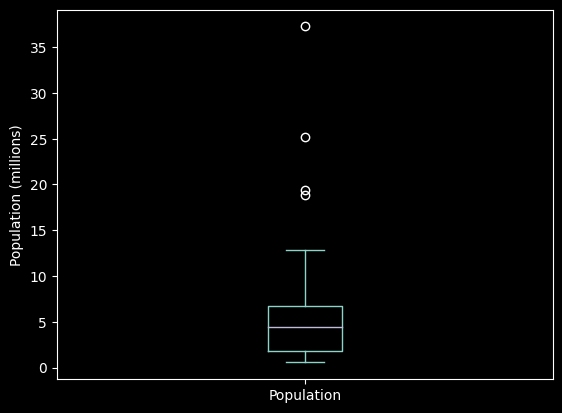

In [ ]:
# Percentile of murder rate by state
murder_rates_percentile_table = murder_rates.quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

print(murder_rates_percentile_table.transpose());

ax = (population/1000000).plot.box();
ax.set_ylabel('Population (millions)')

* There are some **high population outliers.**
* The top & the bottom of the box are 75th & 25th percentiles, respectively. 
* The median is shown by horizontal line in the box. 
* The whiskers (extending lines) from top & bottom of the box indicate the range of bulk of the data. Any data outside of the whiskers is plotted as single points or circles (often considered outliers)

*There are many variations of the boxplot, and may differ from platform per platform*


### Frequency Tables & Histograms
A frequency table of a variable divides up the variable range into equally spaced seg‐
ments and tells us how many values fall within each segment.

In [ ]:
binnedPopulation = pd.cut(population, 10)
binnedPopulation.value_counts();


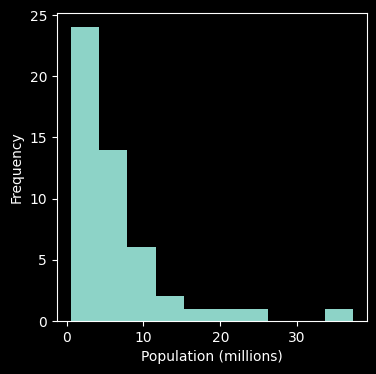

In [ ]:
# Plotting Histogram

ax = (population/ 1_000_000).plot.hist(figsize = (4,4));
ax.set_xlabel('Population (millions)');

* Empty bins are included in the graph. 
* The bins are of equal width. The number of bins (or, equivalently bin size) is upto the user.
* Bars are contigous - no empty space shows between bars, unless there is an empty bin. 

[=] In statistical theory, location and variability are referred to as the first and second moments of a distribution. The third and fourth moments are called skewness and kurtosis. **Skewness** *refers to whether the data is skewed to larger or smaller values*, and **kurtosis** indicates the *propensity of the data to have extreme values.* Generally, **metrics are not used to measure skewness and kurtosis; instead, these are discovered through visual displays such as diagrams above.**

#### Density Plots and Histograms
Density plots are related to histogram, and show the distribution of data values as a continous line. A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a *kernel density estimate*

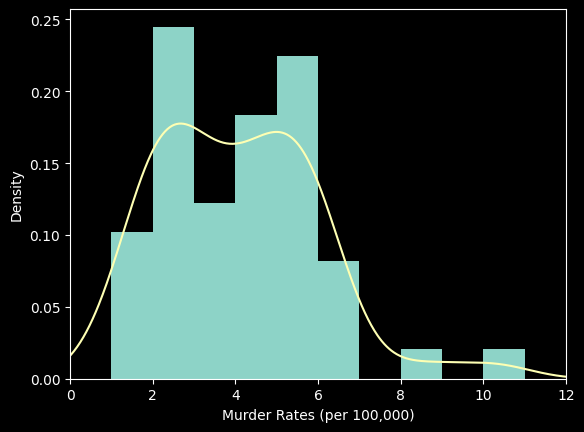

In [ ]:
ax = murder_rates.plot.hist(density=True, xlim=[0,12], bins=range(1,12));
murder_rates.plot.density(ax=ax);
ax.set_xlabel('Murder Rates (per 100,000)');

* A density plot corresponds to plotting the histogram as a proportion rather than counts. *The scale of y-axis is the key distinction here.*
* The total area under the density curve is 1.
* Instead of count in bins you calculate areas under the curve between any two points on the **x-axis**, which corresponds to proportion of distribution between those two points. 

----------------------------
## Exploring Binary & Categorial Data

**Mode** - mosr commonly occuring category or value in a dataset. \
**Expected Value** - when the categories can be associated with a numeric value, this gives an average value based on a category's probability of occurence. \
**Bar Charts** - frequency or proportion for each category plotted as bars. \
**Pie Charts** - frequency or proportion for each category plotted as wedges in a pie.

Getting a summary of binary / categorical variable with a few categories is fairly easy, we just figure out the proportion of 1s, or the proportions of the important categories. 

In [ ]:
dfw = pd.read_csv('./data/dfw_airline.csv');

print(dfw);


    Carrier      ATC   Weather  Security    Inbound
0  64263.16  84856.5  11235.42    343.15  118427.82


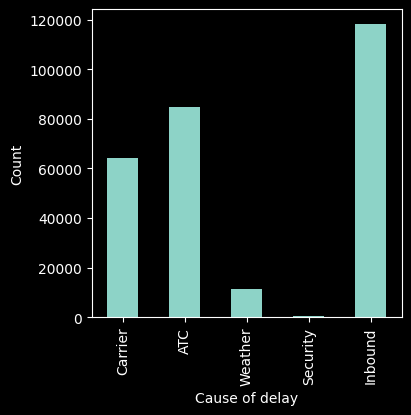

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay');
ax.set_ylabel('Count');

* A bar chart represembles a histogram. 
* In Bar Chart, x-axis represents different categories of a factor variable, while in a histogram, the x-axis represents values of a single variable on a numeric scale. 
* In Histogram, the bars are shown touching each other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another.

\* Pie charts are alternatives to bar charts, although statisticians and data visualization experts generally eschew pie charts as less visually informative.

### Mode

The mode is value, or values in case of a tie - that appears most often in the data. The mode is simply a summary statistic for categorial data, and is generally not used for numeric data. 

#### Expected Value

There is a set of categorical data, in which the categories represent or can be
mapped to discrete values on the same scale.

A marketer for a new cloud technology, for example, offers two levels of service, one priced at $300/month and another at $50/month. The marketer offers free webinars to generate leads, and the firm figures that 5% of the attendees will sign up for the $300 service, 15% will sign up for the $50 service, and 80% will not sign up for anything. This data can be summed up, for financial purposes, in a single “expected value,” which is a form of weighted mean, in which the weights are probabilities (5%, 15%, 80%).

The expected value is calculated as follows,
1. Multiply each outcome by its probability of occurence.
2. Sum these values. 

The expected value if a webinar attendeee, is thus $22.50 per months

$\text{EV} = (0.05)(300) + (0.15)(50) + (0.80)(0) = 22.5$

The expected value is really a form of weighted mean: it adds the ideas of future
expectations and probability weights, often based on subjective judgment.

Expected value is a fundamental concept in business valuation and capital budgeting—for example, the expected value of five years of profits from a new acquisition, or the expected cost savings from new patient management software at a clinic. 

##### [=] Notes
- Categorical data is typically summed up in proportions and can be visualized in a
bar chart. \
- Categories might represent distinct things (apples and oranges, male and female),
levels of a factor variable (low, medium, and high), or numeric data that has been
binned.
- Expected value is the sum of values times their probability of occurrence, often
used to sum up factor variable levels.

Misleading Graphs: https://en.wikipedia.org/wiki/Misleading_graph


### Correlation

Exploratory data analysis in many modeling projects (whether in data science or in
research) involves examining correlation among predictors, and between predictors
and a target variable.

Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go
with low values of Y.\
If high values of X go with low values of Y, and vice versa, the
variables are negatively correlated.



##### Correlation Coefficient
A metric that measures the extent to which numberic variables are associated with one another. (ranges from -1 to +1).

It gives an estimate of the correlation between two variables that always lie on the same scale. Person's correlation coefficient, is calculating by multiplying the deviations from the mean, for both the variables and divide by the product of the standard deviations. 

$
\begin{aligned}
  \text{r} = \frac{\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{(n-1)s_xs_y}
\end{aligned}
$

**The correlation coefficient always lies between +1 & -1**
* +1 indicates (*perfect positive correlation*), and -1 indicates (*perfect negative correlation*); 0 indicates no correlation.
* 
Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric. The relationship between tax rates and revenue raised is an example. As the tax rates increase from 0, the revenue also increases.




##### Correlation Matrix
A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables. 

Correlation matrix for calculating the correlation between the daily returns of banking stocks.

##### Scatterplot 
A plot in which the x-axis is the value of one variable, and y-axis is the value of another. 

In [ ]:
sp500_sym = pd.read_csv("./data/sp500_sectors.csv");
sp500_px = pd.read_csv("./data/sp500_data.csv", index_col=0);

# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

# Next we focus on funds traded on major exchanges (sector == 'etf').

etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

# Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The _seaborn_ package provides a convenient implementation for heatmaps.

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]
                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2

NameError: name 'plt' is not defined